#Pipeline for running inference and classifying squat reps

In [12]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import svm
from sklearn import linear_model
from sklearn import tree

sys.path.append('../data')
sys.path.append('..')
sys.path.append('../inference')

import testing_utils as tu
from ai_trainer import Personal_Trainer

%matplotlib inline

#Step 1: Instantiate our personal trainer and load preprocessed data

In [2]:
pt = Personal_Trainer({'squat':'NeckY'})
exercise = 'squat'

#=====[ Rehydrate dataset for training ]=====
pt.load_reps(exercise, os.path.join('../data/data_sets','multipleClass4.p'))

#Step 2: Extract features 

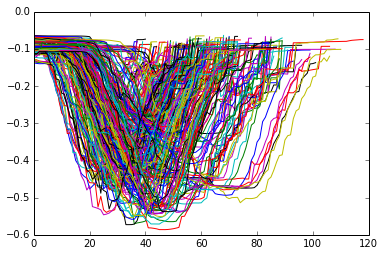

In [3]:
plt.clf()
for squat in pt.get_reps(exercise):
    plt.plot(-squat['NeckY'])

#Step 3: Classification

##Best performing classifiers for 5 squat components

In [4]:
#=====[ Best classifier for bending hips and knees at the same time ]=====

#=====[ The multiples argument is indicative of how many frames we take between a squatter's start and bottom state and their bottom and end state]=====
X3, Y3, file_names = pt.extract_advanced_features(multiples=[float(x)/20 for x in range(1,20)])

print '\n\nDecision Tree with max depth 3 and entropy\n\n'
tu.rnd_prediction(X3['bend_hips_knees'], Y3['bend_hips_knees'], file_names, tree.DecisionTreeClassifier, max_depth=3, criterion="entropy")

math domain error


Decision Tree with max depth 3 and entropy


############ TRAINING DATA ############

Accuracy 0.974285
Precision: 0.997110
Recall: 0.780543
F-score: 0.875635


############ TEST DATA ############

Accuracy 0.897781
Precision: 0.555556
Recall: 0.576923
F-score: 0.566038




In [5]:
#=====[ Best classifier for squat stance ]=====

#=====[ The multiples argument is indicative of how many frames we take between a squatter's start and bottom state and their bottom and end state]=====
X15, Y15, file_names = pt.extract_advanced_features(multiples=[0.2, 0.4, 0.6, 0.8])

print '\n\nLogistic Regression with L1\n\n'
tu.rnd_prediction(X15['stance_width'], Y15['stance_width'], file_names, linear_model.LogisticRegression, penalty='l1')

math domain error


Logistic Regression with L1


############ TRAINING DATA ############

Accuracy 0.978182
Precision: 0.982480
Recall: 0.912390
F-score: 0.946139


############ TEST DATA ############

Accuracy 0.897046
Precision: 0.829268
Recall: 0.723404
F-score: 0.772727




In [6]:
#=====[ Best classifier for squat depth ]=====

#=====[ The multiples argument is indicative of how many frames we take between a squatter's start and bottom state and their bottom and end state]=====
X0, Y0, file_names = pt.extract_advanced_features(multiples=[0.5])

print '\n\nLogistic Regression with L1\n\n'
tu.rnd_prediction(X0['squat_depth'], Y0['squat_depth'], file_names, linear_model.LogisticRegression, penalty='l1', C=0.05)



Logistic Regression with L1


############ TRAINING DATA ############

Accuracy 0.854707
Precision: 0.761219
Recall: 0.918449
F-score: 0.832475


############ TEST DATA ############

Accuracy 0.824315
Precision: 0.757009
Recall: 0.920455
F-score: 0.830769




In [7]:
#=====[ Best classifier for checking if knees over toes ]=====

#=====[ The multiples argument is indicative of how many frames we take between a squatter's start and bottom state and their bottom and end state]=====
X30, Y30, file_names = pt.extract_all_advanced_features(multiples=[float(x)/20 for x in range(1,20)])

y = tu.coalesce_twos(Y30['knees_over_toes'])
print '\n\nDecision Tree with max depth 3 and entropy\n\n'
tu.rnd_prediction(X30, y, file_names, tree.DecisionTreeClassifier, max_depth=3, criterion="entropy")

math domain error


Decision Tree with max depth 3 and entropy


############ TRAINING DATA ############

Accuracy 0.959245
Precision: 0.949802
Recall: 0.988482
F-score: 0.968756


############ TEST DATA ############

Accuracy 0.821856
Precision: 0.825000
Recall: 0.923077
F-score: 0.871287




In [9]:
#=====[ Best classifier for checking the back-hip angle ]=====

#=====[ The multiples argument is indicative of how many frames we take between a squatter's start and bottom state and their bottom and end state]=====
X00, Y00, file_names = pt.extract_all_advanced_features(multiples=[0.5])

print "\n\nLogistic Regression\n\n"
tu.rnd_prediction(X00, Y00['back_hip_angle'], file_names, linear_model.LogisticRegression, penalty = 'l1', C=2.5)



Logistic Regression


############ TRAINING DATA ############

Accuracy 0.977996
Precision: 0.990066
Recall: 0.955882
F-score: 0.972674


############ TEST DATA ############

Accuracy 0.757961
Precision: 0.670000
Recall: 0.788235
F-score: 0.724324




#Step 4: Plot Accuracy and F-Score vs. Number of States

In [10]:
#=====[ Plot accuracy and F-score for knees over toes averaged over 20 iteration ]======
f_score = []
f_score_t = []
accuracy = []
accuracy_t = []

num_iters = 20

#=====[ Using full feature set and y labels for knees_over_toes ]=====
for _ in range(0,num_iters):
    f, ft, a, at = tu.rnd_prediction_increase_training(X30, y, file_names, tree.DecisionTreeClassifier, max_depth=3, criterion="entropy")
    f_score.append(f)
    f_score_t.append(ft)
    accuracy.append(a)
    accuracy_t.append(at)

In [13]:
#=====[ Average each of num_iter runs ]=====
f = [np.average(l) for l in zip(*list(f_score))]
ft = [np.average(l) for l in zip(*list(f_score_t))]
a = [np.average(l) for l in zip(*list(accuracy))]
at = [np.average(l) for l in zip(*list(accuracy_t))]

[0, 200, 0, 1.0]

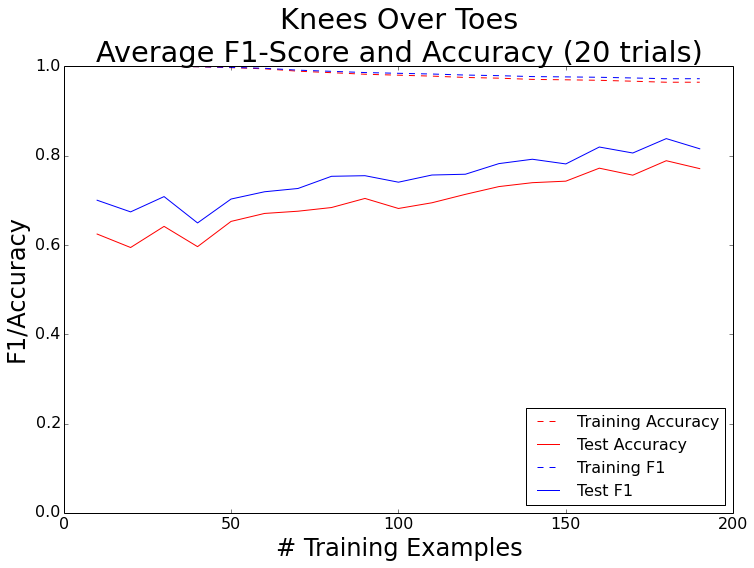

In [14]:
num_training_examples = [x*10 for x in range(1,20)]

#=====[ Plot test and training f_scores and accuracies ]====
plt.plot(num_training_examples, at, color='r', linestyle='--', label='Training Accuracy')
plt.plot(num_training_examples, a, color='r', label='Test Accuracy')
plt.plot(num_training_examples, ft, color='b', linestyle='--', label='Training F1')
plt.plot(num_training_examples, f, color='b', label='Test F1')

#=====[ Add appropriate plot decorations - preparing for saving ]=====
plt.legend(loc='lower right', prop={'size':16})
plt.title('Knees Over Toes \nAverage F1-Score and Accuracy (20 trials)')
plt.xlabel('# Training Examples')
plt.ylabel('F1/Accuracy')
figure = plt.gcf() # get current figure
figure.set_size_inches(12, 8)
plt.rcParams.update({'font.size': 24})
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.axis([0, 200, 0, 1.0])
